In [ ]:
import sys

if "google.colab" in sys.modules:
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
    !python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 603 (delta 131), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (603/603), 199.38 KiB | 11.73 MiB/s, done.
Resolving deltas: 100% (305/305), done.
Installing RAPIDS remaining 25.08 libraries
Using Python 3.12.12 environment at: /usr
Resolved 180 packages in 13.47s
Prepared 41 packages in 41.68s
Uninstalled 31 packages in 1.31s
Installed 41 packages in 720ms
 - bokeh==3.7.3
 + bokeh==3.6.3
 + cucim-cu12==25.8.0
 + cuda-bindings==12.9.4
 + cuda-pathfinder==1.3.1
 - cuda-python==12.6.2.post1
 + cuda-python==12.9.4
 - cudf-cu12==25.6.0 (from https://pypi.nvidia.com/cudf-cu12/cudf_cu12-25.6.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl)
 + cudf-cu12==25.8.0
 + cugraph-cu12==25.8.0
 - cuml-cu12==25.6.0
 + cuml-cu12==25.8.0
 - cuvs-cu12==25.6.1
 + cuvs-cu12==25.8.0
 + 

# 데이터 생성



X 크기: (1000000, 100)
y 크기: (1000000,)


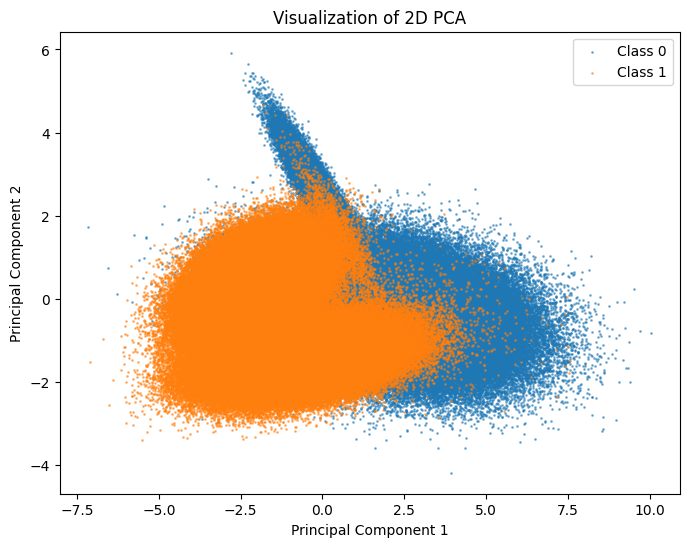

In [ ]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 가상 데이터 생성
# n_classes: 분류할 클래스의 수 (2개의 클래스)
# n_features: 생성할 특징(feature)의 수 (100개의 특징)
# n_samples: 생성할 샘플의 수 (1,000,000의 샘플)
# random_state: 데이터 생성의 무작위성을 고정하기 위한 시드 (재현 가능한 결과를 위해 사용)
X, y = make_classification(n_classes=2,
                           n_features=100,
                           n_samples=1000000,
                           random_state=0)
print('X 크기:', X.shape)
print('y 크기:', y.shape)

# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.5, label='Class 0', s=1)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.5, label='Class 1', s=1)
plt.title('Visualization of 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# scikit-learn Linear Regression

In [ ]:
%%time

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


# 가상 데이터 생성 (scikit-learn 라이브러리 사용)
X, y = make_classification(n_classes=2,
                           n_features=100,
                           n_samples=1000000,
                           random_state=0)

# 데이터셋을 학습(75%) 및 테스트(25%)로 분할
# train_test_split의 test_size 기본값은 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scikit-learn 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습: 학습 데이터(X_train, y_train)를 사용하여 모델을 학습시킴
model.fit(X_train, y_train)

# 학습한 모델의 예측: 테스트 데이터(X_test)를 사용하여 확률 예측
y_pred = model.predict(X_test)

# accuracy_score를 사용하기 위해 예측 결과를 이진 분류로 변환
# 확률이 0.5 이상이면 1, 미만이면 0으로 처리
y_pred_binary = (y_pred >= 0.5).astype(int)

# 정확도 측정 : 실제 값(y_test)과 이진 분류된 예측 값(y_pred_binary)을 비교하여 정확도 계산
sklearn_accuracy = accuracy_score(y_test, y_pred_binary)

# 정확도 출력
print('scikit-learn Linear Regression 정확도:', sklearn_accuracy)

scikit-learn Linear Regression 정확도: 0.905028
CPU times: user 18 s, sys: 1.6 s, total: 19.6 s
Wall time: 14.9 s


# cuML Linear Regression

In [ ]:
%%time

from cuml.datasets.classification import make_classification
from cuml.model_selection import train_test_split
from cuml.linear_model import LinearRegression
from cuml.metrics import accuracy_score
import cupy as cp


# 가상 데이터 생성 (cuML 라이브러리 사용, GPU에 데이터 생성)
X, y = make_classification(n_classes=2,
                           n_features=100,
                           n_samples=1000000,
                           random_state=0)

# 데이터셋을 학습(75%) 및 테스트(25%)로 분할
# train_test_split의 test_size 기본값은 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# cuML 선형 회귀 모델 생성
# copy_X=True: 입력 데이터 X의 복사본을 생성하여 원본 데이터의 변형을 방지
# copy_X=False: 입력 데이터 X의 복사본을 생성하지 않고 메모리 절약 가능하나 원본 데이터가 변경될 수 있음
model = LinearRegression(copy_X=True)

# 모델 학습: 학습 데이터(X_train, y_train)를 사용하여 모델을 학습시킴
model.fit(X_train, y_train)

# 학습한 모델의 예측: 테스트 데이터(X_test)를 사용하여 확률 예측
y_pred = model.predict(X_test)

# accuracy_score를 사용하기 위해 예측 결과를 이진 분류로 변환
# 확률이 0.5 이상이면 1, 미만이면 0으로 처리
y_pred_binary = (y_pred >= 0.5).astype(cp.int32)

# 정확도 측정 : 실제 값(y_test)과 이진 분류된 예측 값(y_pred_binary)을 비교하여 정확도 계산
cuml_accuracy = accuracy_score(y_test, y_pred_binary)

# 정확도 출력
print('cuML Linear Regression 정확도:', cuml_accuracy)

cuML Linear Regression 정확도: 0.99512
CPU times: user 266 ms, sys: 17 ms, total: 283 ms
Wall time: 282 ms
